# GRAFÃO

**Funções e importações:**

In [1]:
from functools import partial

In [2]:
#importando funções
from functions import generate_graph_from_path as constroi_grafo
from functions import show_neighbors as mostra_vizinhos
from functions import calculate_path_distance as tamanho_caminho
from functions import plot_graph as mostra_grafo
from functions import populacao_de_caminhos as gerar_populacao
from functions import selecao_torneio_min as funcao_selecao
from functions import funcao_objetivo_grafo as funcao_objetivo
from functions import mutacao_troca as funcao_mutacao
from functions import cruzamento_cruzado as funcao_cruzamento

**Hiperparâmetros editáveis:**

In [3]:
# Definindo vértice inicial e final
start_vertex = 'A'
end_vertex = 'B'
NUM_VERTICES = 10  # Número de vértices desejado
TAMANHO_DA_POPULACAO = 10 
TAMANHO_TORNEIO = 3
NUM_GERACOES = 10
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.2

**Grafo aleatório:**

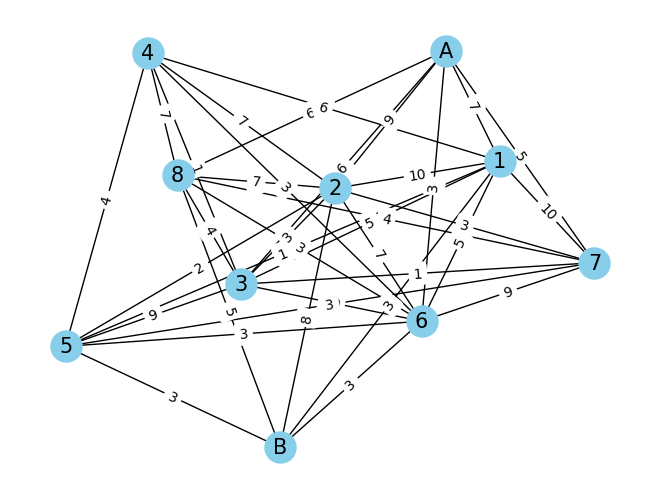

V[ertices do grafo['A', '1', '2', '3', '4', '5', '6', '7', '8', 'B']


In [4]:
# Cria o grafo com o número de vértices desejado
graph, path_vertices = constroi_grafo(NUM_VERTICES)

# Plota o grafo
mostra_grafo(graph)

print(f'V[ertices do grafo{path_vertices}')

**Nota:** Esse grafo simula diversos caminhos entre dois pontos arbitrários (A e B), com distâncias aleatórias. portanto, não há caminhos que não levam ao ponto B ou becos sem saída, visto que nosso objetivo é o caminho com a menor distância.

In [5]:
populacao = gerar_populacao(graph, start_vertex, end_vertex, TAMANHO_DA_POPULACAO)

In [6]:
funcao_objetivo = partial(funcao_objetivo, G=graph)

In [7]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(graph, proxima_geracao, CHANCE_MUTACAO, end_vertex)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao

In [8]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia_min = tamanho_caminho(graph, melhor_individuo_observado)

print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia_min)

Melhor individuo obtido por algoritmos genéticos:
['A', '6', 'B'] com distância: 6
